In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.cluster import DBSCAN
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2020_AI_Busan_FinalGroup/Vibration_Normal_1029/LoggedData01.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5] )
df

,X1,Y1,Z1,X2,Y2,Z2
0,0.020508,-0.019043,1.090332,0.008789,-0.002930,1.327637
1,0.028809,-0.023926,1.093018,0.030273,-0.013428,1.320557
2,0.055420,-0.060059,1.085205,0.019531,0.012207,1.333252
3,0.035889,-0.062012,1.085449,-0.029541,0.002197,1.313477
4,-0.006104,-0.029053,1.086670,0.004395,-0.014893,1.326904
...,...,...,...,...,...,...
180276,0.024658,-0.001221,1.088867,0.016113,0.003906,1.323486
180277,0.038086,-0.044922,1.087891,0.008789,0.009521,1.341553
180278,-0.034180,-0.040771,1.093994,0.014893,-0.005371,1.318604
180279,0.005371,-0.006348,1.093994,0.010010,0.001465,1.335693


In [ ]:
ab_df = pd.read_csv('/content/drive/MyDrive/2020_AI_Busan_FinalGroup/Abnormaldata(10.08)/LoggedData01.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5] )
ab_df

,X1,Y1,Z1,X2,Y2,Z2
0,-0.004883,-0.031311,-0.015686,-0.015686,-0.015686,-0.015686
1,-0.015686,-0.015686,-0.015686,-0.015686,-0.015686,-0.015686
2,-0.015686,-0.015686,1.106445,-0.015686,-0.015686,-0.015686
3,-0.015686,-0.015686,1.093689,-0.015686,-0.015686,-0.015686
4,-0.010742,-0.015686,1.109314,-0.015686,-0.015686,-0.015686
...,...,...,...,...,...,...
179879,-0.015686,-0.046936,-0.005859,-0.015686,-0.015686,-0.015686
179880,-0.015686,-0.031311,-0.007080,-0.015686,-0.015686,-0.015686
179881,-0.015686,-0.046936,-0.006836,-0.015686,-0.015686,-0.015686
179882,-0.015686,-0.032471,-0.015686,-0.015686,-0.015686,-0.015686


In [ ]:
from scipy import signal
from scipy.fft import fftshift
import scipy

In [ ]:
tmp=pd.concat([df['X1'], ab_df['X1']])
tmp.index = range(len(tmp))
tmp = pd.DataFrame(tmp)
tmp

,X1
0,0.020508
1,0.028809
2,0.055420
3,0.035889
4,-0.006104
...,...
360160,-0.015686
360161,-0.015686
360162,-0.015686
360163,-0.015686


In [ ]:
for s in range(1, 9):
  tmp['shift_{}'.format(s)] = tmp['X1'].shift(s)
tmp

,X1,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8
0,0.020508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.028809,0.020508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.055420,0.028809,0.020508,NaN,NaN,NaN,NaN,NaN,NaN
3,0.035889,0.055420,0.028809,0.020508,NaN,NaN,NaN,NaN,NaN
4,-0.006104,0.035889,0.055420,0.028809,0.020508,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
360160,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287,-0.015686
360161,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287
360162,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598
360163,-0.015686,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725


In [ ]:
tmp = tmp.dropna()
tmp.index = range(tmp.shape[0])

In [ ]:
tmp['label'] = 0
tmp['label'][180281-9:] = 1

In [ ]:
tmp.iloc[:,:-1]

,X1,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8
0,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809,0.020508
1,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809
2,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420
3,0.005127,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889
4,0.019775,0.005127,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104
...,...,...,...,...,...,...,...,...,...
360152,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287,-0.015686
360153,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287
360154,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598
360155,-0.015686,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725


In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=90, metric='euclidean')
for i in range(0, tmp.shape[0]-1000, 100) :
  tmp_truncated = tmp.iloc[i:i+1000,:-1]
  dbscan.fit(tmp_truncated.values)

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=90, metric='euclidean')
for i in range(0, tmp.shape[0]-1000, 100) :
  tmp_truncated = tmp.iloc[i:i+1000,:-1]
  dbscan.fit(tmp_truncated.values)

tmp['dbscan_labels'] = None

for i in range(10) :
  a = int(360157 / 10)
  if i < 9 :
    tmp['dbscan_labels'][a*i : a*(i+1)] = dbscan.fit_predict(tmp.iloc[a*i: a*(i+1),:-1].values)
  else :
    tmp['dbscan_labels'][a*i :] = dbscan.fit_predict(tmp.iloc[a * i:,:-1].values)
tmp.head(2)

,X1,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,label,dbscan_labels
0,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809,0.020508,0,0
1,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809,0,0


In [ ]:
# target 대비 dbscan_labels가 얼마나 잘 분류되었는지 평가 확인
tmp.groupby('label')['dbscan_labels'].value_counts()
# -1 : 잡음 포인트 -> 노이즈
# 군집의 수 => 2개, 군집을 하다보니 2개가 되었다 => DBSCAN은 군집의 수를 넣지 않는다  

label  dbscan_labels
0       0               180263
       -1                    9
1       0               144067
        1                35818
Name: dbscan_labels, dtype: int64

In [ ]:
# 연결 끊겨서 날아가는 거 대비
tmp.to_csv("/content/drive/MyDrive/2020_AI_Busan_FinalGroup/Vibration_tmp.csv")

In [ ]:
tmp['acc'] = 0
for i in range(tmp.shape[0]):
  if tmp.label[i] == tmp.dbscan_labels[i]:
    tmp.acc[i] = 0
  else:
    tmp.acc[i] = 1

tmp['acc_pct']=tmp.acc.apply(lambda x : 100 if x == 0 else 0 )
tmp.acc_pct = tmp.acc_pct.cumsum()
tmp

,X1,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,label,dbscan_labels,acc,acc_pct
0,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809,0.020508,0,0,0,100
1,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0.028809,0,0,0,200
2,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0.055420,0,0,0,300
3,0.005127,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0.035889,0,0,0,400
4,0.019775,0.005127,-0.002930,0.031982,0.021729,0.058594,0.004639,0.000732,-0.006104,0,0,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360152,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287,-0.015686,1,0,1,21608100
360153,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,-0.019287,1,0,1,21608100
360154,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,0.037598,1,0,1,21608100
360155,-0.015686,-0.015686,-0.015686,-0.015686,-0.015686,0.015564,0.046814,-0.005615,0.042725,1,0,1,21608100


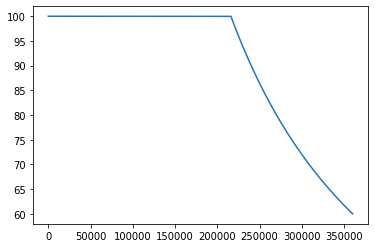

In [ ]:
plt.plot(tmp.acc_pct / (tmp.index+1))